In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

START_YEAR = 1992
END_YEAR = 2020
HEM = 'sh'

PATH_SOURCE = "/home/jbassham/jack/data/sh"
PATH_DEST = "/home/jbassham/jack/data/sh/inputs_v1"

In [2]:
# Extract variables

fnam = f"motion_ppv4_latlon_{HEM}_{START_YEAR}_{END_YEAR}.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ui = data['u'] # zonal ice velocity
vi = data['v'] # meridional ice velocity
r = data['error'] # ice velocity uncertainty (for u and v)
lat = data['lat']
lon = data['lon']
time = data['time']

fnam = f"con_nimbus7_latlon_{HEM}_{START_YEAR}_{END_YEAR}.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ic = data['ic'] # ice concentration

fnam = f"wind_JRA55_latlon_{HEM}_{START_YEAR}_{END_YEAR}.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
uw = data['u']
vw = data['v']

print('Variable Files Loaded')

# Mask ice concentration
ic_raw = np.round(ic * 250) # raw value ice concentration (NSIDC)

# NSIDC Masks 
# 251 pole hole
# 252 unused data
# 253 coastline
# 254 land
ic = np.where((ic_raw == 251) | (ic_raw == 252) | (ic_raw == 253) | (ic_raw == 254), np.nan, ic)

# Shift present day parameters forward one day, for one point Middle Weddell
uit = ui[1:,:,:]
vit = vi[1:,:,:]
uwt = uw[1:,:,:]
vwt = vw[1:,:,:]
ict = ic[1:,:,:]
tt = time[1:]
rt = r[1:,:,:]

# Remove last day from previous day parameters
icy = ic[:-1,:,:]
ty = time[:-1]

Variable Files Loaded


In [ ]:
# Calculate speed
cit = np.sqrt(uit ** 2 + vit ** 2)

In [5]:
# Create list of input variables
invars = [uit, vit, rt, uwt, vwt, icy]
nvars = len(invars)
var_names = ['uit', 'vit', 'rt', 'uwt', 'vwt', 'icy']

# # Calcluate pre-mask means and stds
# globMeans = [np.nanmean(var) for var in invars]
# gridMeans = [np.nanmean(var, axis = 0) for var in invars]

# globStds = [np.nanstd(var) for var in invars]
# gridStds = [np.nanstd(var, axis = 0) for var in invars]

# for globMean, var_name in zip(globMeans, var_names):
#     print(f"Mean {var_name}: {globMean:.3f}")    

# print()

# for globStd, var_name in zip(globStds, var_names):
#     print(f"Std {var_name}: {globStd:.3f}")

In [6]:
# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridMeans[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Mean {var_names[i]}", xlabel="Longitude", ylabel="Latitude")

# plt.show()

# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridStds[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Std {var_names[i]}", xlabel="Longitude", ylabel="Latitude")

# plt.show()

In [7]:
# # Test means and stds when removing flag values in uncertainty and ice concentration == 0

# # Mask spatial indices with ice velocity uncertainties than 999 and 0 concentration ice motion
# mask1 = (ict == 0) | (np.isnan(ict)) | (rt >= 999) | (rt <= -999)

# invarsMask1 = [np.where(mask1, np.nan, var) for var in invars]

# # Calcluate first-masked means and stds
# globMeans1 = [np.nanmean(var) for var in invarsMask1]
# gridMeans1 = [np.nanmean(var, axis = 0) for var in invarsMask1]

# globStds1 = [np.nanstd(var) for var in invarsMask1]
# gridStds1 = [np.nanstd(var, axis = 0) for var in invarsMask1]

# for globMean, var_name in zip(globMeans1, var_names):
#     print(f"Mean {var_name}: {globMean:.3f}")    

# print()

# for globStd, var_name in zip(globStds1, var_names):
#     print(f"Std {var_name}: {globStd:.3f}")

In [8]:
# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridMeans1[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Mean {var_names[i]}; Mask 1", xlabel="Longitude", ylabel="Latitude")

# plt.show()

# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridStds1[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Std {var_names[i]}; Mask 1", xlabel="Longitude", ylabel="Latitude")

# plt.show()

In [9]:
# Mask spatial indices with concentration less than .15, NaN concentration
# NOTE keeping flag values for ice velocity uncertainties
mask2 = (ict <= .15) | (np.isnan(ict))

# NaN out points meeting mask condition
invarsMask2 = [np.where(mask2, np.nan, var) for var in invars]

# Calcluate first-masked means and stds
globMeans2 = [np.nanmean(var) for var in invarsMask2]
gridMeans2 = [np.nanmean(var, axis = 0) for var in invarsMask2]

globStds2 = [np.nanstd(var) for var in invarsMask2]
gridStds2 = [np.nanstd(var, axis = 0) for var in invarsMask2]

for globMean, var_name in zip(globMeans2, var_names):
    print(f"Mean {var_name}: {globMean:.3f}")    

print()

for globStd, var_name in zip(globStds2, var_names):
    print(f"Std {var_name}: {globStd:.3f}")

/tmp/ipykernel_461424/4038096303.py:10: RuntimeWarning: Mean of empty slice
  gridMeans2 = [np.nanmean(var, axis = 0) for var in invarsMask2]
/home/jbassham/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Mean uit: -0.005
Mean vit: 2.198
Mean rt: 62.547
Mean uwt: -0.025
Mean vwt: 1.035
Mean icy: 0.785

Std uit: 9.508
Std vit: 8.375
Std rt: 59.266
Std uwt: 6.360
Std vwt: 5.161
Std icy: 0.197


In [13]:
cit_std = np.nanstd(cit)

print(f"Std cit: {cit_std:.3f}")

Std cit: 7.939


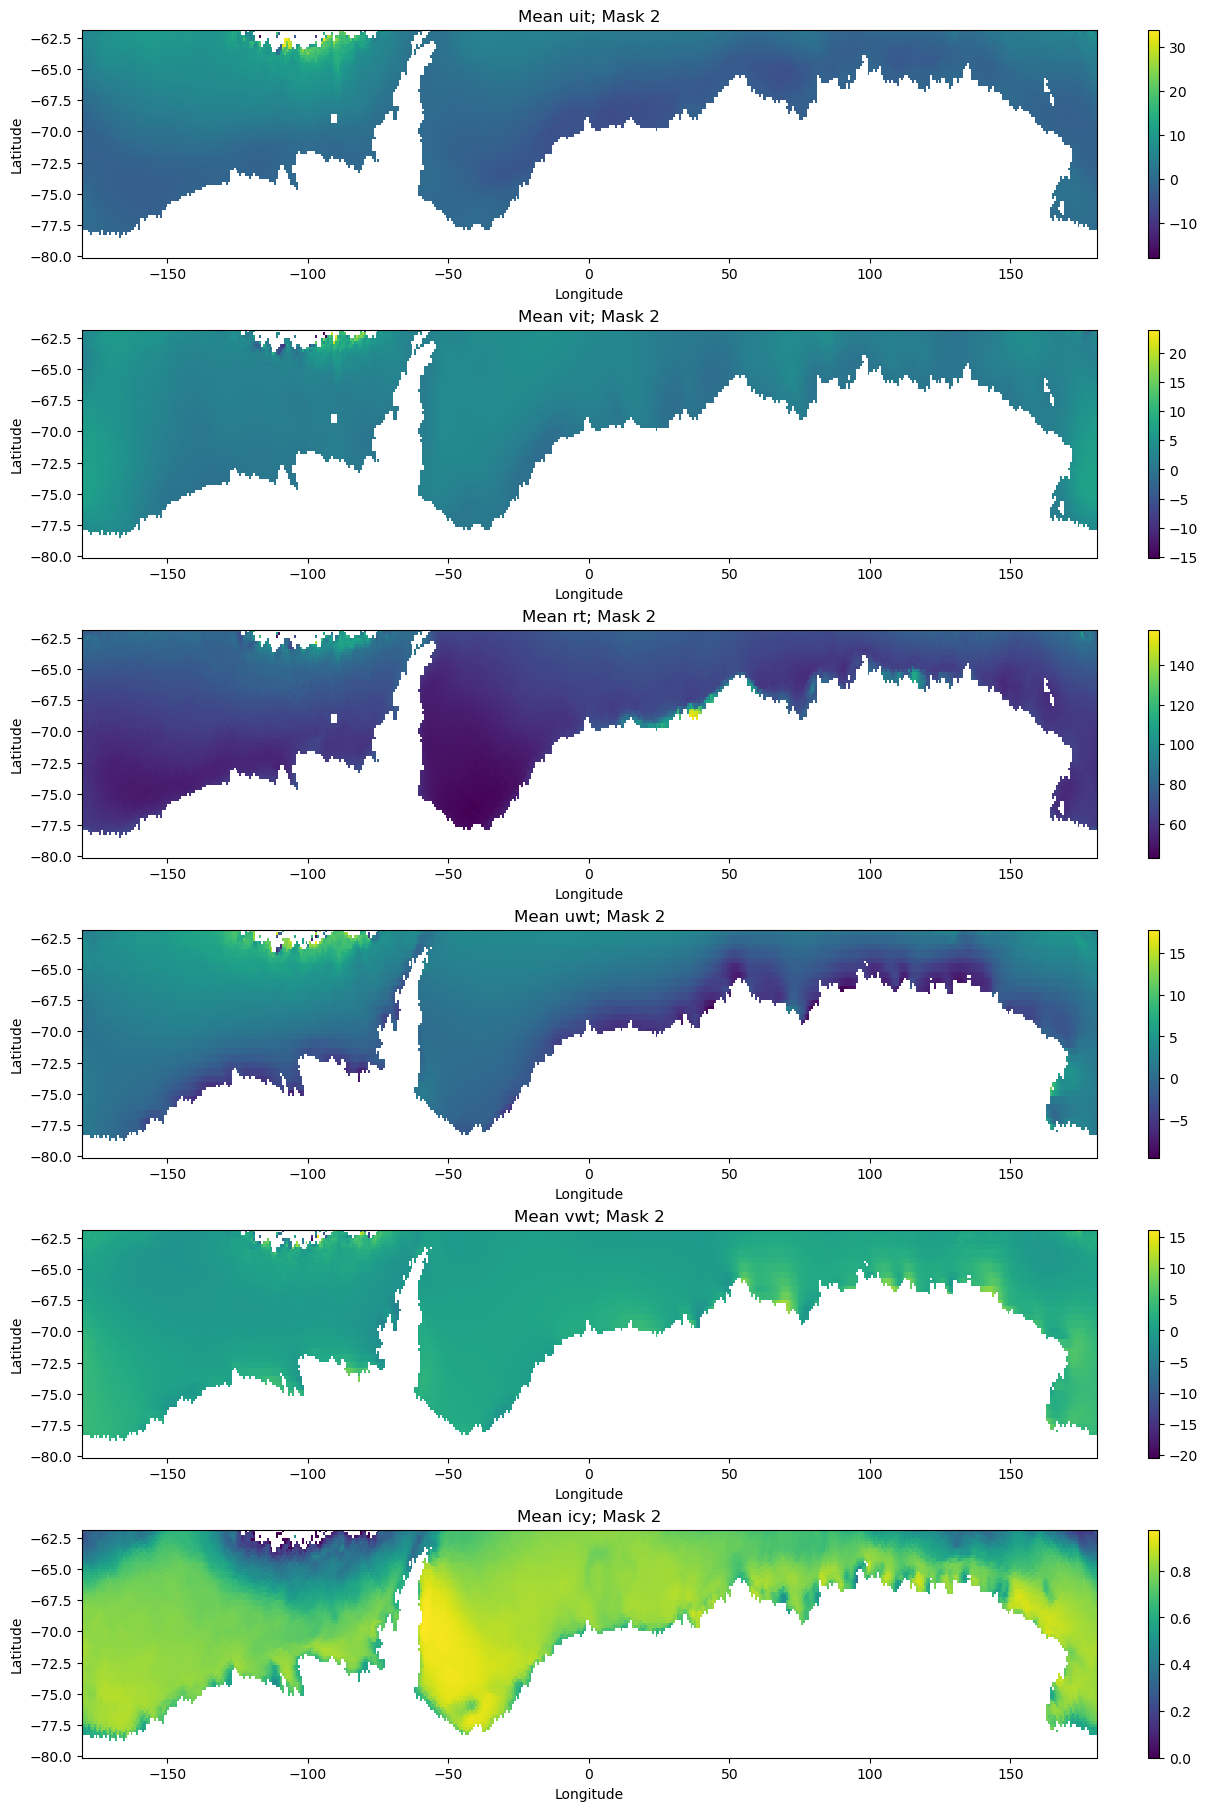

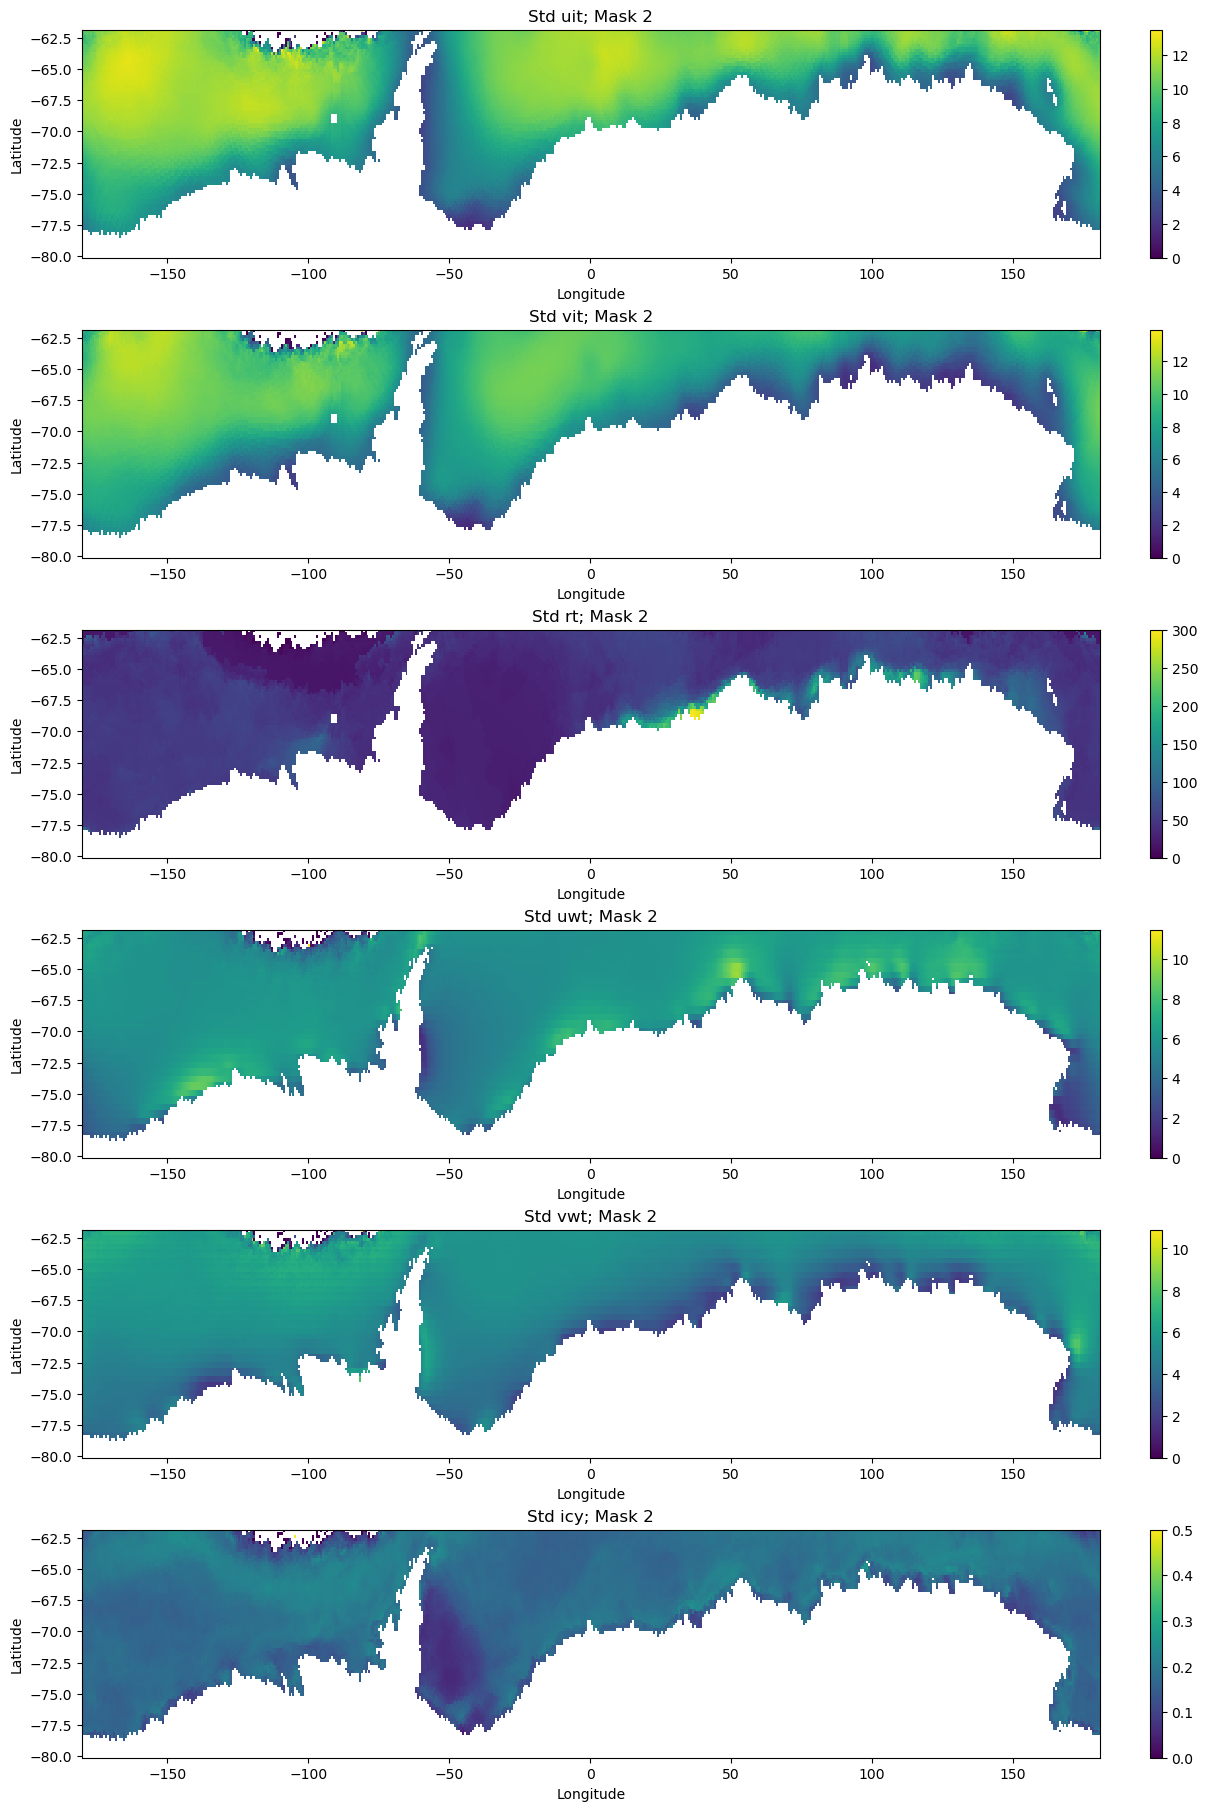

In [13]:
fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

for i in range(nvars):
    pcm = axs[i].pcolormesh(lon, lat, gridMeans2[i])
    fig.colorbar(pcm, ax=axs[i])
    axs[i].set(title=f"Mean {var_names[i]}; Mask 2", xlabel="Longitude", ylabel="Latitude")

plt.show()

fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

for i in range(nvars):
    pcm = axs[i].pcolormesh(lon, lat, gridStds2[i])
    fig.colorbar(pcm, ax=axs[i])
    axs[i].set(title=f"Std {var_names[i]}; Mask 2", xlabel="Longitude", ylabel="Latitude")

plt.show()

In [14]:
# Mask spatial indices with concentration less than .15, NaN concentration
# NOTE keeping flag values for ice velocity uncertainties
mask3 = (np.nanmean(ict, axis = 0) <= .15) | (np.isnan(ict))

# NaN out points meeting mask condition
invarsMask3 = [np.where(mask2, np.nan, var) for var in invars]

# Calcluate first-masked means and stds
globMeans3 = [np.nanmean(var) for var in invarsMask3]
gridMeans3 = [np.nanmean(var, axis = 0) for var in invarsMask3]

globStds3 = [np.nanstd(var) for var in invarsMask3]
gridStds3 = [np.nanstd(var, axis = 0) for var in invarsMask3]

for globMean, var_name in zip(globMeans3, var_names):
    print(f"Mean {var_name}: {globMean:.3f}")    

print()

for globStd, var_name in zip(globStds3, var_names):
    print(f"Std {var_name}: {globStd:.3f}")

/tmp/ipykernel_2834685/3809501411.py:3: RuntimeWarning: Mean of empty slice
  mask3 = (np.nanmean(ict, axis = 0) <= .15) | (np.isnan(ict))
/tmp/ipykernel_2834685/3809501411.py:10: RuntimeWarning: Mean of empty slice
  gridMeans3 = [np.nanmean(var, axis = 0) for var in invarsMask3]
/home/jbassham/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Mean uit: -0.005
Mean vit: 2.198
Mean rt: 62.547
Mean uwt: -0.025
Mean vwt: 1.035
Mean icy: 0.785

Std uit: 9.508
Std vit: 8.375
Std rt: 59.266
Std uwt: 6.360
Std vwt: 5.161
Std icy: 0.197


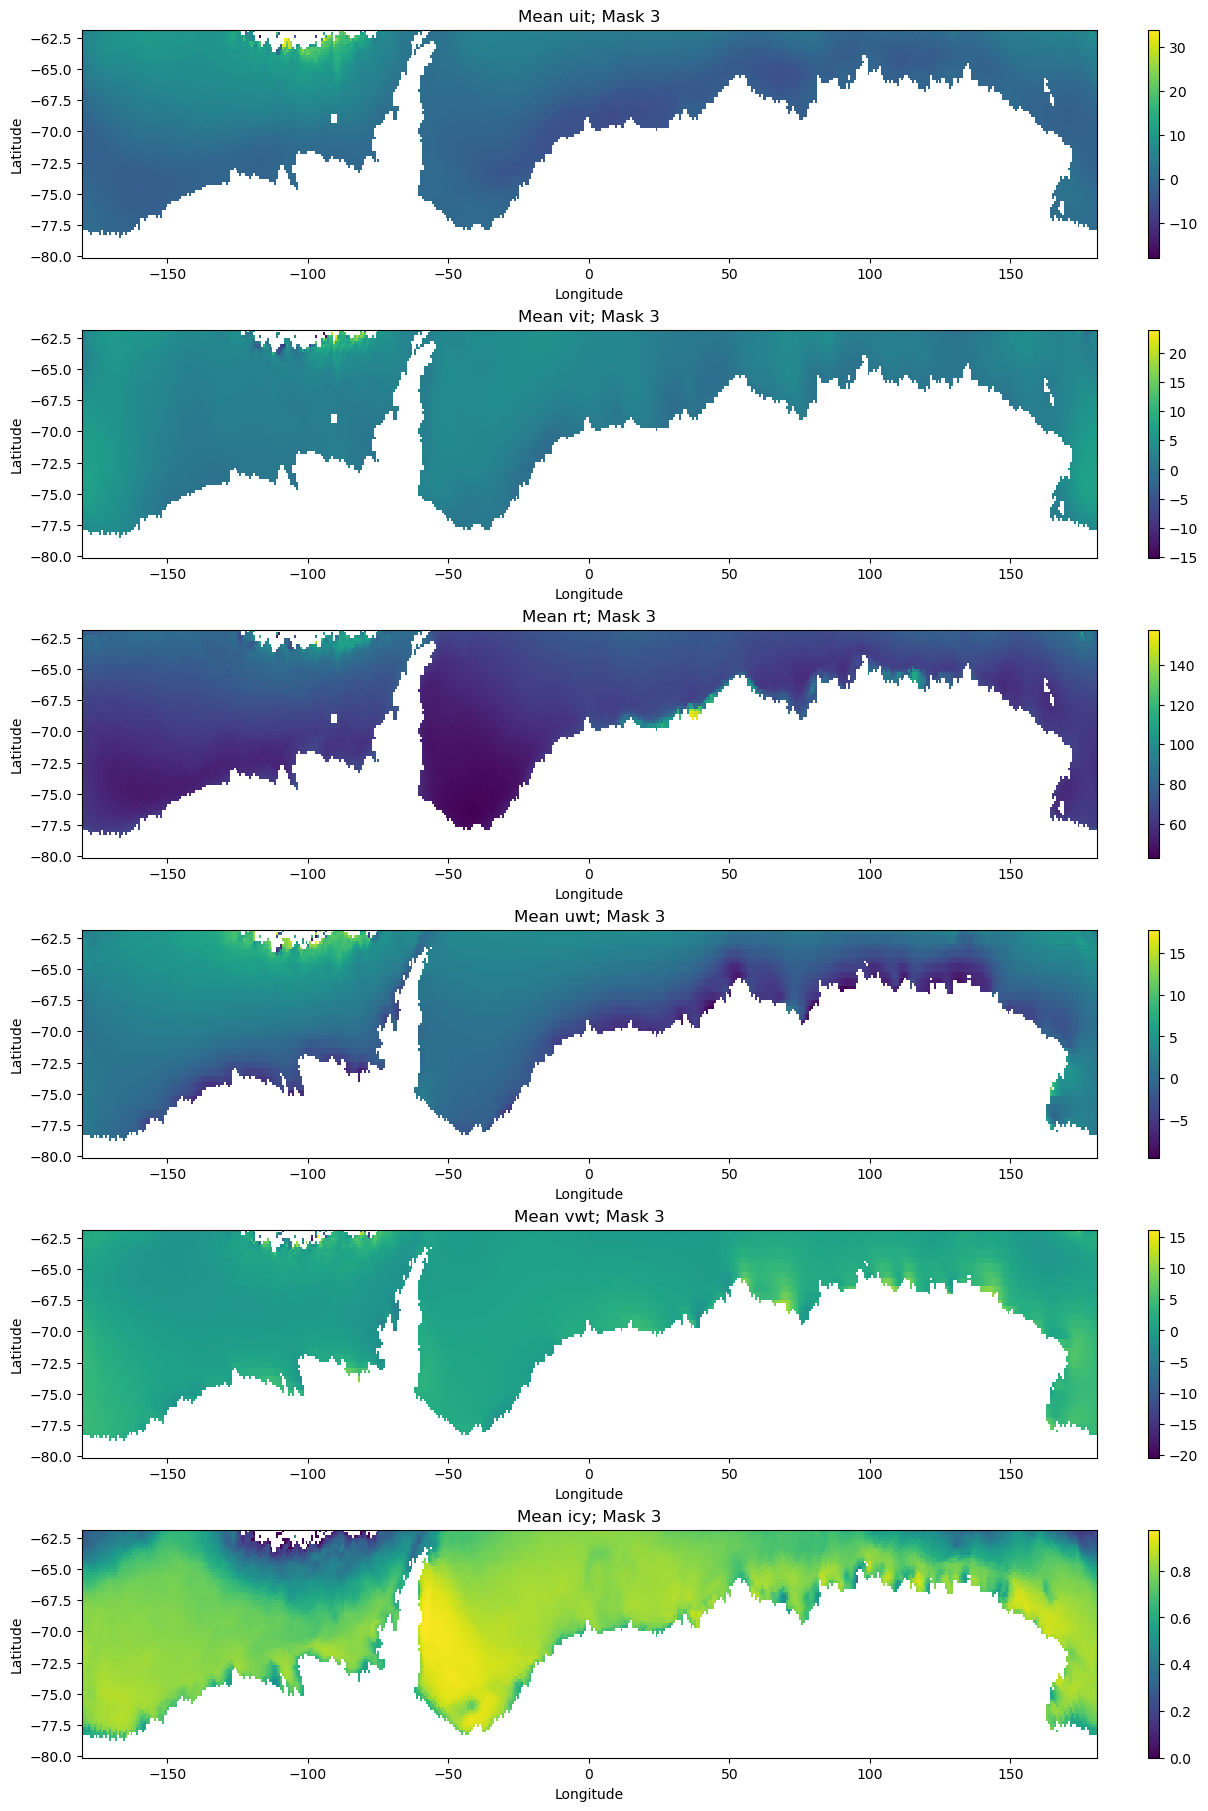

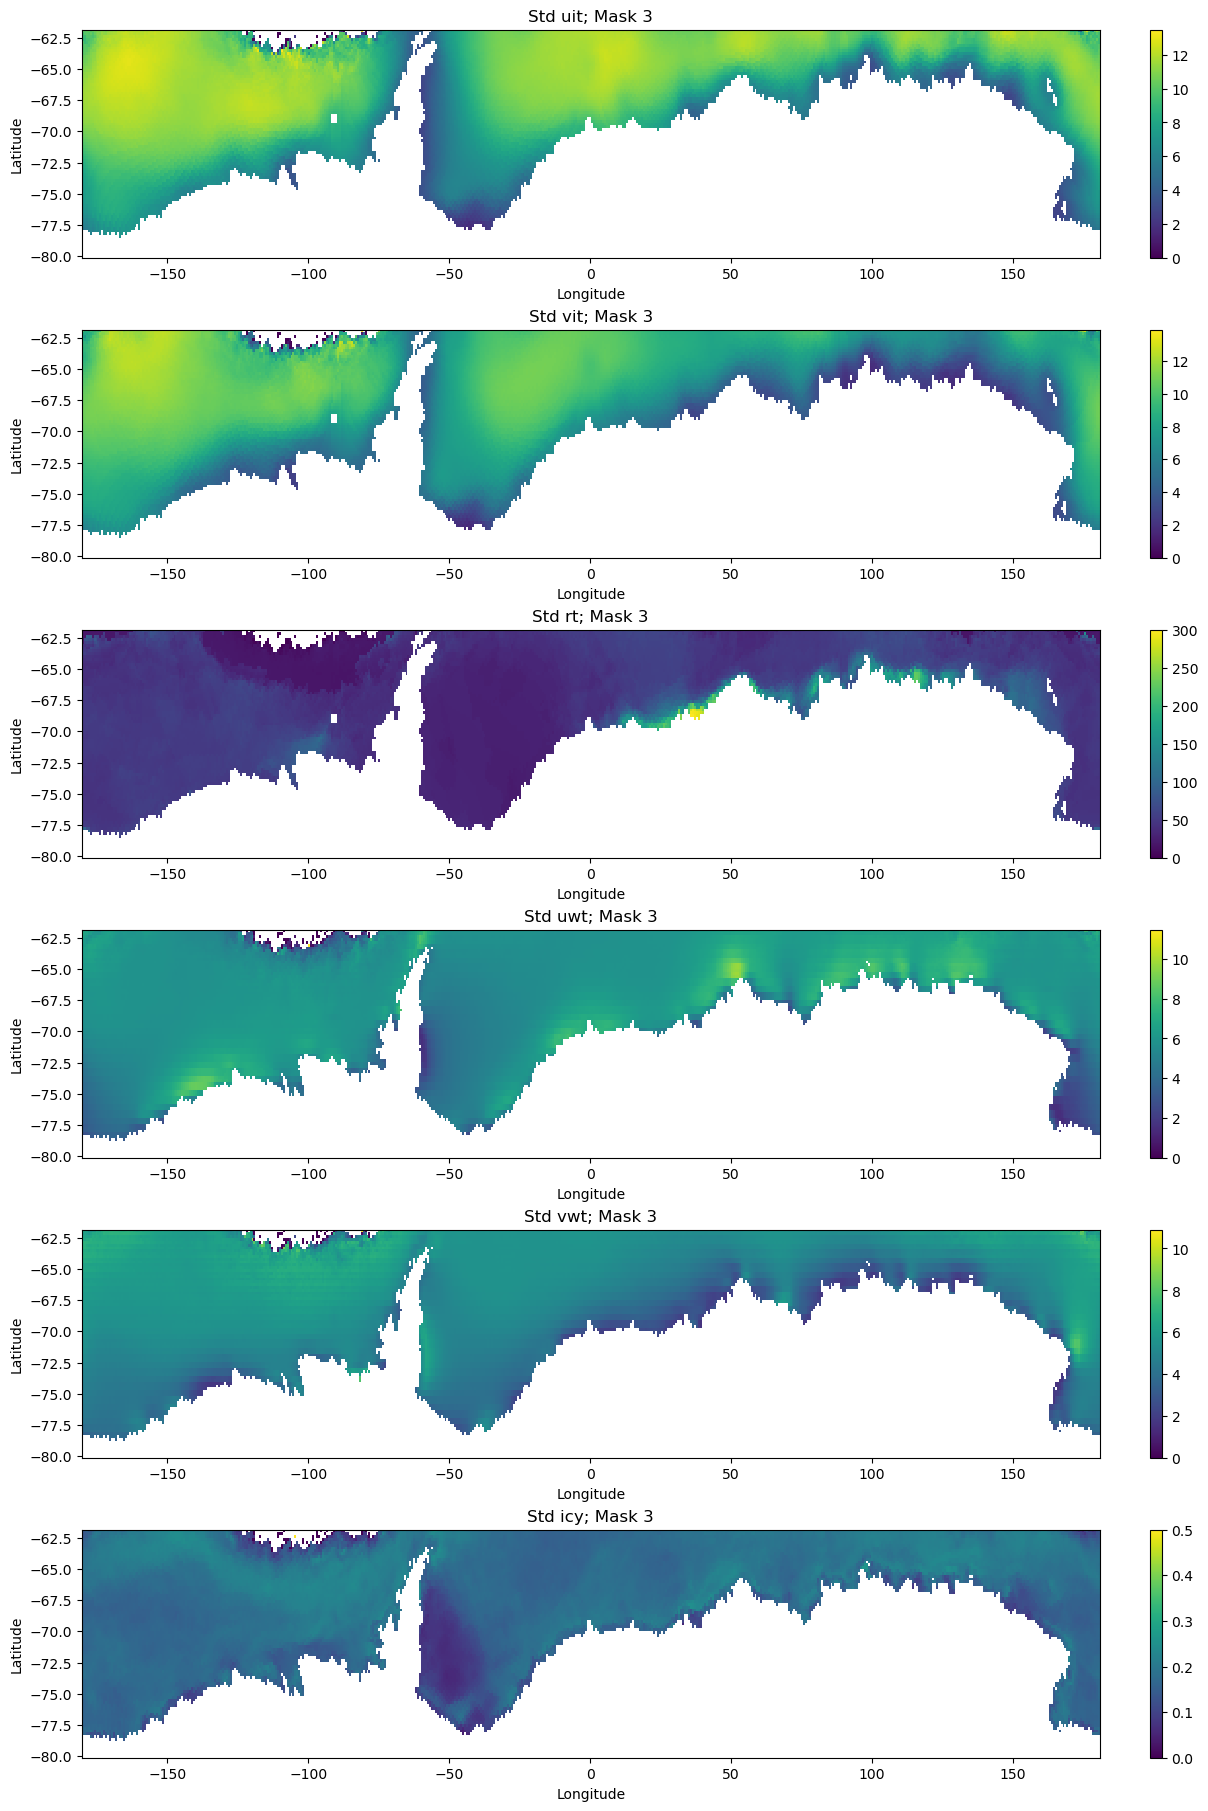

In [15]:
fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

for i in range(nvars):
    pcm = axs[i].pcolormesh(lon, lat, gridMeans3[i])
    fig.colorbar(pcm, ax=axs[i])
    axs[i].set(title=f"Mean {var_names[i]}; Mask 3", xlabel="Longitude", ylabel="Latitude")

plt.show()

fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

for i in range(nvars):
    pcm = axs[i].pcolormesh(lon, lat, gridStds3[i])
    fig.colorbar(pcm, ax=axs[i])
    axs[i].set(title=f"Std {var_names[i]}; Mask 3", xlabel="Longitude", ylabel="Latitude")

plt.show()

In [ ]:
# Continue with Mask 2 (keeping flag values in uncertainty)

# Remove temporal mean from inputs at every gridpoint
invars_demean = [var - mean for var, mean in zip(invarsMask2, gridMeans2)]

# Compute global standard deviation (entire time series) of demeaned inputs
stds = [np.nanstd(var) for var in invars_demean]

print("Stds after removing mean;")
for std, var_name in zip(stds, var_names):
    print(f"   Std {var_name}: {std:.3f}")

Std uit: 9.033
Std vit: 8.201
Std rt: 58.416
Std uwt: 5.789
Std vwt: 4.884
Std icy: 0.172


In [18]:
# Unpack statistics
uit_m, vit_m, rt_m, uwt_m, vwt_m, icy_m = gridMeans2
uit_std, vit_std, rt_std, uwt_std, vwt_std, icy_std = stds

# Unpack input variables
uit, vit, rt, uwt, vwt, icy = invars_demean

# Normalize variables by global standard deviation (z-score normalization)
# NOTE Uncertainty normalized by average of u and v ice velocity std

uitn = uit / uit_std
vitn = uit / vit_std

rt_std_star = (uit_std + vit_std) / 2
print(f"rt std star; {rt_std_star:.3f}")
rtn = rt / rt_std_star

uwtn = uwt / uwt_std
vwtn = vwt / vwt_std

icyn = icy / icy_std

rt std star; 8.617


In [ ]:
# Save normalized input variables

fnam = f'inputs_normalized_{HEM}_{START_YEAR}_{END_YEAR}.npz'

np.savez(
    os.path.join(PATH_DEST, fnam),
    uitn = uitn, vitn = vitn, 
    rtn = rtn, 
    uwtn = uwtn, vwtn = vwtn,
    icyn = icyn
    )

print(f"Normalized inputs saved at: \n {PATH_DEST}/{fnam}")

Normalized inputs saved at: 
 /home/jbassham/jack/data/sh/inputs/inputs_normalized_sh_1992_2020.npz


In [ ]:
# Save statistics for normalization

fnam = f'stats_for_normalization_{HEM}_{START_YEAR}_{END_YEAR}.npz'

np.savez(
    os.path.join(PATH_DEST, fnam),
    uit_m = uit_m, vit_m = vit_m, 
    rt_m = rt_m, 
    uwt_m = uwt_m, vwt_m = vwt_m, 
    icy_m = icy_m,
    uit_std = uit_std, vit_std = vit_std, 
    rt_std_star = rt_std_star, 
    uwt_std = uwt_std, vwt_std = vwt_std, 
    icy_std = icy_std
)

print(f"Stats for normalizing saved at: \n {PATH_DEST}/{fnam}")

Stats for normalizing saved at: 
 /home/jbassham/jack/data/sh/inputs/stats_for_normalization_sh_1992_2020.npz


In [21]:
#  # Save dates

# fnam = f'time_today_{HEM}_{START_YEAR}_{END_YEAR}.npz'

# np.savez(
#     os.path.join(PATH_DEST, fnam),
#     time_today = tt
# )

# print(f"'Present day' time saved at: \n {PATH_DEST}/{fnam}")

'Present day' time saved at: 
 /home/jbassham/jack/data/sh/inputs/time_today_sh_1992_2020.npz


In [22]:
# fnam = f'lat_lon_{HEM}.npz'

# np.savez(
#     os.path.join(PATH_DEST, fnam),
#     lat = lat,
#     lon = lon
# )

# print(f"Lat Lon vars saved at: \n {PATH_DEST}/{fnam}")

Lat Lon vars saved at: 
 /home/jbassham/jack/data/sh/inputs/lat_lon_sh.npz
